In [7]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import glob
%matplotlib inline

In [8]:
from keras.preprocessing.image import ImageDataGenerator

#Image Data Generator w/ no augmentation
#Scaling for pixels
piece_train_datagen = ImageDataGenerator(
    rescale = 1./255)
piece_test_datagen = ImageDataGenerator(
    rescale = 1./255)
piece_valid_datagen = ImageDataGenerator(
    rescale = 1./255)


#Flow data from directory

piece_train_iter = piece_train_datagen.flow_from_directory(
    directory = 'data/piece_data/train',
    target_size = (135,135),
    color_mode = 'grayscale',
    class_mode = 'categorical',
    seed=42
)

piece_test_iter = piece_test_datagen.flow_from_directory(
    directory = 'data/piece_data/test',
    target_size = (135,135),
    color_mode = 'grayscale',
    class_mode = 'categorical',
    shuffle=False,
    seed=42
)

piece_valid_iter = piece_valid_datagen.flow_from_directory(
    directory = 'data/piece_data/valid',
    target_size = (135,135),
    color_mode = 'grayscale',
    class_mode = 'categorical',
    seed=42
)

Found 1227 images belonging to 7 classes.
Found 335 images belonging to 7 classes.
Found 331 images belonging to 7 classes.


In [9]:
#Define NN architecture

from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

piece_model = Sequential()
piece_model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(135, 135, 1)))
piece_model.add(MaxPooling2D(pool_size=2))
piece_model.add(BatchNormalization())
piece_model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
piece_model.add(MaxPooling2D(pool_size=2))
piece_model.add(BatchNormalization())
piece_model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
piece_model.add(MaxPooling2D(pool_size=2))
piece_model.add(GlobalAveragePooling2D())
piece_model.add(Dense(7, activation='softmax'))


piece_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 135, 135, 16)      80        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 67, 67, 16)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 67, 67, 16)        64        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 67, 67, 32)        2080      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 33, 33, 32)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 33, 33, 32)        128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 33, 33, 64)        8256      
__________

In [10]:
# compile the model
piece_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

STEP_SIZE_TRAIN = piece_train_iter.n/piece_train_iter.batch_size
STEP_SIZE_VALID = piece_valid_iter.n/piece_valid_iter.batch_size



In [11]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='baseline_model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
piece_hist = piece_model.fit_generator(generator=piece_train_iter, 
                          steps_per_epoch=STEP_SIZE_TRAIN, 
                          validation_data=piece_valid_iter, 
                          validation_steps=STEP_SIZE_VALID,
                          epochs=100, 
                          callbacks=[checkpointer], 
                          verbose=2)

Epoch 1/100
Epoch 00000: val_loss improved from inf to 1.93246, saving model to baseline_model.weights.best.hdf5
4s - loss: 1.8433 - acc: 0.2463 - val_loss: 1.9325 - val_acc: 0.1843
Epoch 2/100
Epoch 00001: val_loss did not improve
1s - loss: 1.6989 - acc: 0.3099 - val_loss: 1.9485 - val_acc: 0.1269
Epoch 3/100
Epoch 00002: val_loss did not improve
1s - loss: 1.6298 - acc: 0.3473 - val_loss: 1.9535 - val_acc: 0.1601
Epoch 4/100
Epoch 00003: val_loss did not improve
1s - loss: 1.5919 - acc: 0.3654 - val_loss: 1.9843 - val_acc: 0.1571
Epoch 5/100
Epoch 00004: val_loss did not improve
1s - loss: 1.5525 - acc: 0.3864 - val_loss: 2.1804 - val_acc: 0.1420
Epoch 6/100
Epoch 00005: val_loss did not improve
1s - loss: 1.5474 - acc: 0.3859 - val_loss: 2.1028 - val_acc: 0.1662
Epoch 7/100
Epoch 00006: val_loss did not improve
1s - loss: 1.5218 - acc: 0.4048 - val_loss: 2.3061 - val_acc: 0.1511
Epoch 8/100
Epoch 00007: val_loss did not improve
1s - loss: 1.4784 - acc: 0.4245 - val_loss: 2.1279 - v

Epoch 00064: val_loss did not improve
1s - loss: 0.9129 - acc: 0.6591 - val_loss: 3.5672 - val_acc: 0.2961
Epoch 66/100
Epoch 00065: val_loss did not improve
1s - loss: 0.8622 - acc: 0.6839 - val_loss: 3.9871 - val_acc: 0.3565
Epoch 67/100
Epoch 00066: val_loss improved from 1.31684 to 1.29538, saving model to baseline_model.weights.best.hdf5
1s - loss: 0.8458 - acc: 0.6830 - val_loss: 1.2954 - val_acc: 0.5166
Epoch 68/100
Epoch 00067: val_loss did not improve
1s - loss: 0.8430 - acc: 0.6862 - val_loss: 2.1365 - val_acc: 0.4350
Epoch 69/100
Epoch 00068: val_loss improved from 1.29538 to 1.13069, saving model to baseline_model.weights.best.hdf5
1s - loss: 0.8277 - acc: 0.6990 - val_loss: 1.1307 - val_acc: 0.5770
Epoch 70/100
Epoch 00069: val_loss did not improve
1s - loss: 0.8552 - acc: 0.6778 - val_loss: 1.3999 - val_acc: 0.4653
Epoch 71/100
Epoch 00070: val_loss did not improve
1s - loss: 0.8320 - acc: 0.6868 - val_loss: 1.4657 - val_acc: 0.4713
Epoch 72/100
Epoch 00071: val_loss did 

In [12]:
#Reset test iterator
STEP_SIZE_TEST = piece_test_iter.n/piece_test_iter.batch_size
piece_test_iter.reset()
# load the weights that yielded the best validation accuracy
piece_model.load_weights('baseline_model.weights.best.hdf5')
# evaluate and print test accuracy
score = piece_model.evaluate_generator(generator=piece_test_iter,steps=STEP_SIZE_TEST)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.513432835821


In [13]:
piece_test_iter.reset()
piece_pred = piece_model.predict_generator(piece_test_iter,steps=STEP_SIZE_TEST,verbose=1)

10/10 [===========================>..] - ETA: 0s

In [14]:
predicted_class_indices=np.argmax(piece_pred,axis=1)
print(predicted_class_indices)

[0 0 0 0 3 0 3 0 0 3 0 0 2 0 0 0 0 0 0 3 0 0 0 0 0 0 5 0 0 0 0 3 0 2 3 2 2
 3 0 0 0 5 5 0 5 3 0 1 5 0 2 4 0 1 1 1 4 4 2 0 1 3 0 5 0 2 5 0 1 4 3 3 1 1
 0 1 4 1 1 3 0 0 3 0 2 3 2 5 0 5 5 2 3 0 5 0 2 3 5 2 0 3 5 2 2 2 3 0 3 0 0
 3 3 5 0 0 0 3 3 0 0 0 5 2 3 2 0 3 0 2 0 0 2 0 0 2 0 2 0 5 0 3 3 3 5 2 3 3
 3 5 0 5 0 0 3 3 3 5 3 5 0 3 5 3 3 3 3 3 3 5 3 5 5 3 5 5 3 3 3 0 3 5 0 3 3
 3 5 3 0 3 5 5 0 0 0 1 4 5 5 3 1 0 4 0 4 1 4 0 0 0 0 0 0 0 5 5 0 0 5 4 3 0
 0 4 3 3 2 5 5 5 5 3 2 2 3 3 2 5 5 2 5 5 5 5 3 5 0 5 0 5 3 3 5 3 5 5 3 3 5
 3 3 5 2 5 3 5 5 5 3 5 5 3 3 5 5 5 5 0 5 3 5 5 5 3 3 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6]


In [15]:
labels = (piece_test_iter.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
truth =  [labels[k] for k in piece_test_iter.classes]

In [16]:
[labels[k] for k in piece_test_iter.classes]


['bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',

In [17]:
piece_test_iter.filenames

['bishop/1538778538.3017461.jpg',
 'bishop/1539025832.837544.jpg',
 'bishop/1539025486.6533895.jpg',
 'bishop/1538779519.5865016.jpg',
 'bishop/1538778643.4925923.jpg',
 'bishop/1539023363.830272.jpg',
 'bishop/1539025801.510389.jpg',
 'bishop/1538778410.6081142.jpg',
 'bishop/1538778215.8878355.jpg',
 'bishop/1538778752.467536.jpg',
 'bishop/1539025373.0113628.jpg',
 'bishop/1539023140.397658.jpg',
 'bishop/1539025334.2429533.jpg',
 'bishop/1538778214.3746974.jpg',
 'bishop/1539023732.561326.jpg',
 'bishop/1538777556.4695792.jpg',
 'bishop/1539024760.3120384.jpg',
 'bishop/1538778091.9695802.jpg',
 'bishop/1539024593.521976.jpg',
 'bishop/1538779155.2682924.jpg',
 'bishop/1538778833.610855.jpg',
 'bishop/1538777891.4931645.jpg',
 'bishop/1539017656.6888525_5.jpg',
 'bishop/1538778427.8668559.jpg',
 'bishop/1538777675.2653856.jpg',
 'bishop/1538778093.2397656.jpg',
 'bishop/1539024725.794323.jpg',
 'bishop/1539026035.275597.jpg',
 'bishop/1539024424.9014952.jpg',
 'bishop/1539024039.37

In [18]:
filenames=piece_test_iter.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Truth": truth,
                      "Predictions":predictions})

In [19]:
results

,Filename,Predictions,Truth
0,bishop/1538778538.3017461.jpg,bishop,bishop
1,bishop/1539025832.837544.jpg,bishop,bishop
2,bishop/1539025486.6533895.jpg,bishop,bishop
3,bishop/1538779519.5865016.jpg,bishop,bishop
4,bishop/1538778643.4925923.jpg,pawn,bishop
5,bishop/1539023363.830272.jpg,bishop,bishop
6,bishop/1539025801.510389.jpg,pawn,bishop
7,bishop/1538778410.6081142.jpg,bishop,bishop
8,bishop/1538778215.8878355.jpg,bishop,bishop
9,bishop/1538778752.467536.jpg,pawn,bishop


In [20]:
from sklearn.metrics import classification_report
class_report = classification_report(piece_test_iter.classes,predicted_class_indices)
print(class_report)

             precision    recall  f1-score   support

          0       0.35      0.66      0.46        47
          1       0.79      0.33      0.47        33
          2       0.50      0.23      0.31        61
          3       0.37      0.55      0.44        51
          4       0.55      0.19      0.28        32
          5       0.47      0.52      0.50        61
          6       1.00      1.00      1.00        50

avg / total       0.56      0.51      0.50       335



In [21]:
from sklearn.metrics import confusion_matrix
cmatrix = confusion_matrix(piece_test_iter.classes,predicted_class_indices)
print(cmatrix)
print(labels)

[[31  0  4  8  0  4  0]
 [ 7 11  3  4  5  3  0]
 [25  0 14 13  0  9  0]
 [ 7  0  1 28  0 15  0]
 [16  3  0  2  6  5  0]
 [ 3  0  6 20  0 32  0]
 [ 0  0  0  0  0  0 50]]
{0: 'bishop', 1: 'king', 2: 'knight', 3: 'pawn', 4: 'queen', 5: 'rook', 6: 'square'}


In [22]:
from sklearn.metrics import log_loss
log_loss_result = log_loss(piece_test_iter.classes,piece_pred)
print(log_loss_result)

1.21999811646


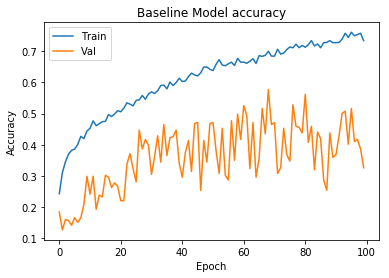

In [24]:
plt.plot(piece_hist.history['acc'])
plt.plot(piece_hist.history['val_acc'])
plt.title('Baseline Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

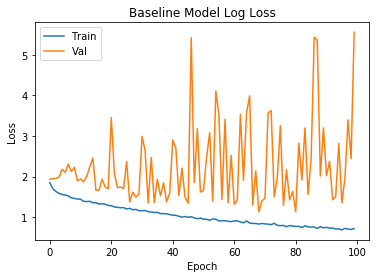

In [25]:
plt.plot(piece_hist.history['loss'])
plt.plot(piece_hist.history['val_loss'])
plt.title('Baseline Model Log Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

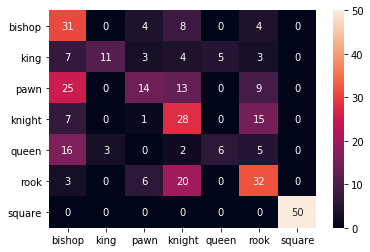

In [31]:
import seaborn as sns
ax = sns.heatmap(cmatrix, annot=True, xticklabels=['bishop','king','pawn','knight','queen','rook','square'],yticklabels=['bishop','king','pawn','knight','queen','rook','square'])

In [ ]:
from sklearn.metrics import log_loss
log_loss_result = log_loss(piece_test_iter.classes,piece_pred)
print(log_loss_result)